# To implement Decision Tree Algorithm using Scikit Learn Library and understand its working.



# Weather dataset

In [79]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from google.colab import drive
import pandas as pd
import numpy as np

dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Naive Bayes/Dataset1.csv')
le = preprocessing.LabelEncoder()

Outlook_encoded = le.fit_transform(dataset['Outlook'])
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outllok mapping:",Outlook_name_mapping)

Temperature_encoded = le.fit_transform(dataset['Temp'])
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Temperature mapping:",Temperature_name_mapping)

Humidity_encoded = le.fit_transform(dataset['Humidity'])
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)

Wind_encoded = le.fit_transform(dataset['Wind'])
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)

Play_encoded = le.fit_transform(dataset['Play'])
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)

print("\n\n")

print("Weather:" ,Outlook_encoded)
print("Temerature:" ,Temperature_encoded)
print("Humidity:" ,Humidity_encoded)
print("Wind:" ,Wind_encoded)
print("Play:" ,Play_encoded)

Outllok mapping: {'O': 0, 'R': 1, 'S': 2}
Temperature mapping: {'C': 0, 'H': 1, 'M': 2}
Humidity mapping: {'High': 0, 'Low': 1, 'Normal': 2}
Wind mapping: {'F': 0, 'T': 1}
Play mapping: {'N': 0, 'Y': 1}



Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temerature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [2 0 2 2 2 1 2 2 1 0 0 1 2 2]
Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [80]:
features=list(zip(Outlook_encoded,Temperature_encoded,Humidity_encoded,Wind_encoded))
print("Features:",features)

Features: [(1, 1, 2, 0), (1, 1, 0, 1), (0, 1, 2, 0), (2, 2, 2, 0), (2, 0, 2, 0), (2, 0, 1, 1), (0, 0, 2, 1), (1, 2, 2, 0), (1, 0, 1, 0), (2, 2, 0, 0), (1, 2, 0, 1), (0, 2, 1, 1), (0, 1, 2, 0), (2, 2, 2, 1)]


In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,Play_encoded , test_size=0.3, random_state=100)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[(2, 0, 2, 0), (0, 0, 2, 1), (0, 1, 2, 0), (1, 1, 2, 0), (1, 2, 0, 1), (1, 2, 2, 0), (2, 2, 2, 0), (2, 2, 2, 1), (1, 0, 1, 0)]
[(0, 2, 1, 1), (0, 1, 2, 0), (2, 0, 1, 1), (1, 1, 0, 1), (2, 2, 0, 0)]
[1 1 1 0 1 0 1 0 1]
[1 1 0 0 1]


In [82]:
#clf = DecisionTreeClassifier(criterion = "entropy", random_state = 100)
clf = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 2)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(y_pred)

pred1 = clf.predict([(1,2,2,0)])
print(pred1)

pred2 = clf.predict([(2,0,2,1)])
print(pred2)

[1 0 1 1 1]
[0]
[1]


In [83]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test, y_pred))
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

Accuracy: 0.4
[[0 2]
 [1 2]]
precision: 0.5
recall: 0.6666666666666666


clf: the trained decision tree model


out_file: the name of the output file in the dot format


feature_names: a list of the feature names used in the model


class_names: a list of the class names used in the model

filled: a Boolean value indicating whether to fill the decision boxes with color or not

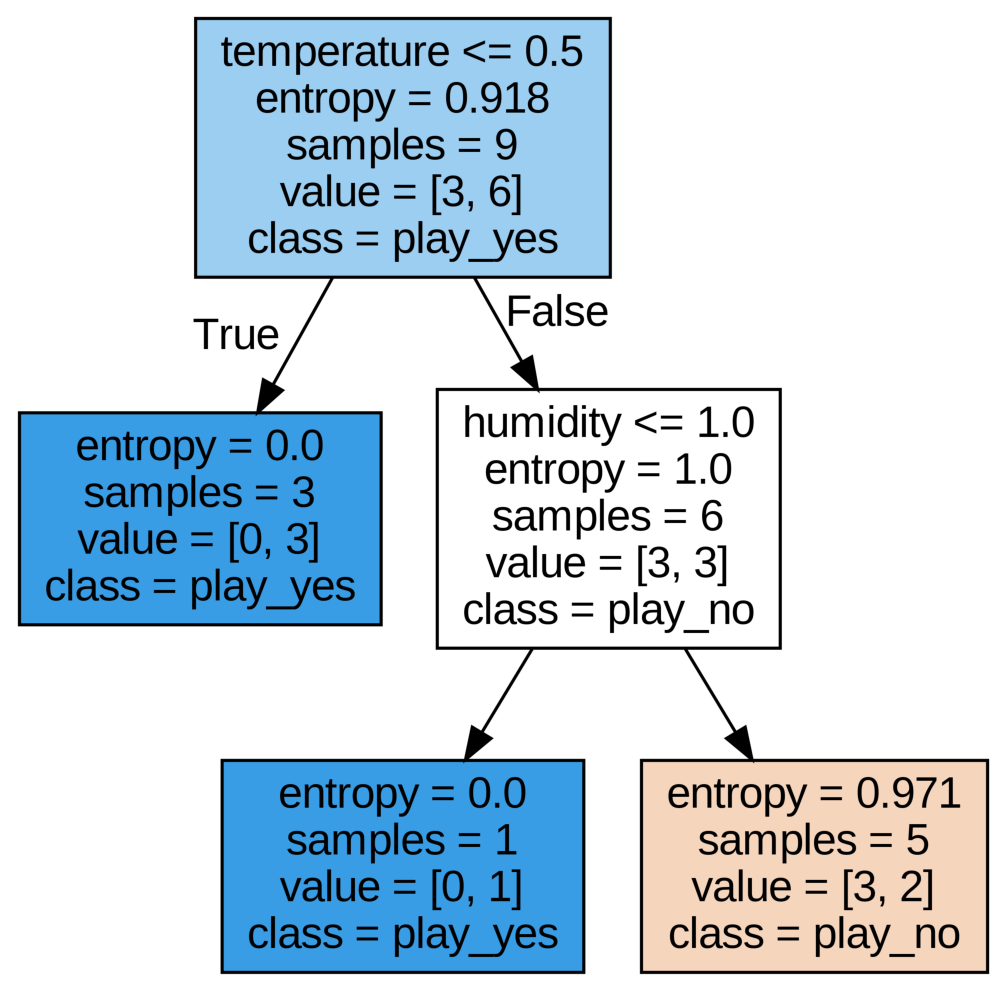

In [84]:
from sklearn.tree import export_graphviz
export_graphviz(clf,out_file='tree_entropy.dot',
feature_names=['outlook','temperature','humidity','wind'],
class_names=['play_no','play_yes'],
filled='true')
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png',
'-Gdpi=600'])
# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (40, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();

Iris dataset

# Iris dataset

# Exercise :

# *1) 1<=Rollnumber<=25: Task 1: Try the algo on Same Weather dataset - OneHotEncoding of features: and Train test Division 70%-30%*

prediction of test data [1 0 1 0 0]
Accuracy: 0.6
confusion matrix [[3 2]
 [0 0]]
precision: 0.0
recall: 0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


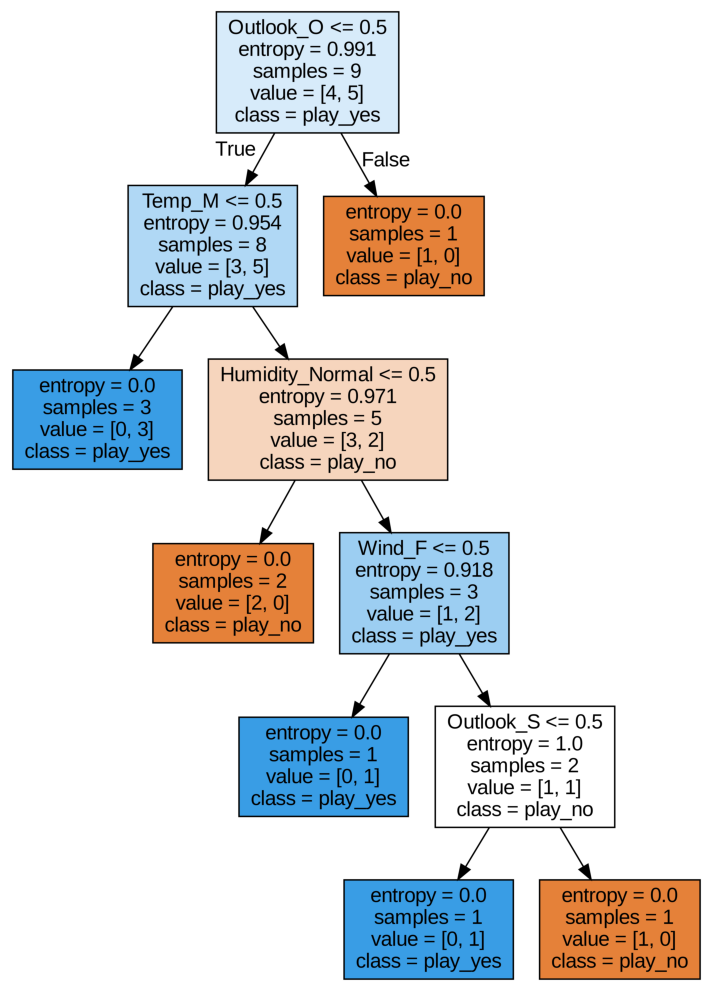

In [85]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from google.colab import drive
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Naive Bayes/Dataset1.csv')
one_hot = pd.get_dummies(dataset, columns=['Outlook','Temp','Humidity','Wind','Play'])
#print(one_hot)
features = one_hot.drop(['Play_N', 'Play_Y'], axis=1)
label = one_hot[['Play_N','Play_Y']].values[:, 0]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,label, test_size=0.3, random_state=0)
'''print(X_train)
print(X_test)
print(y_train)
print(y_test)'''
clf = DecisionTreeClassifier(criterion = "entropy", random_state =100, max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print('prediction of test data',y_pred)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('confusion matrix',confusion_matrix(y_test, y_pred))
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
from sklearn.tree import export_graphviz
export_graphviz(clf,out_file='weather_entropy.dot',feature_names=['Outlook_O','Outlook_R','Outlook_S',
    'Temp_C','Temp_H','Temp_M','Humidity_High','Humidity_Low','Humidity_Normal','Wind_F','Wind_T'],
class_names=['play_no','play_yes'],
filled='true')
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'weather_entropy.dot', '-o', 'weather_entropy.png',
'-Gdpi=600'])
# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (40, 18))
plt.imshow(plt.imread('weather_entropy.png'))
plt.axis('off');
plt.show();

# 2) Apply algorithm on wine dataset - LabelEncoding of features: and Train test Division 80%-20%

Encoded feature values:
 [[118.  43.  44. ...  49. 120.  94.]
 [ 65.  49.  18. ...  50. 102.  92.]
 [ 63.  71.  63. ...  48.  86. 101.]
 ...
 [ 68. 119.  29. ...   6.  10.  74.]
 [ 64.  81.  38. ...   7.  14.  75.]
 [112. 117.  69. ...   8.  13.  40.]]
Encoded target values:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
prediction of test data [1 2 0 0 1 1 1 1 1 0 2 1 2 2 2 0 2 0 1 0 1 0 1 1 0 0 1 1 1 2 2 1 0 1 2 1]
Accuracy: 0.8333333333333334
confusion matrix [[ 8  0  0]
 [ 2 13  0]
 [ 0  4  9]]
precision: 0.857516339869281
recall: 0.8333333333333334


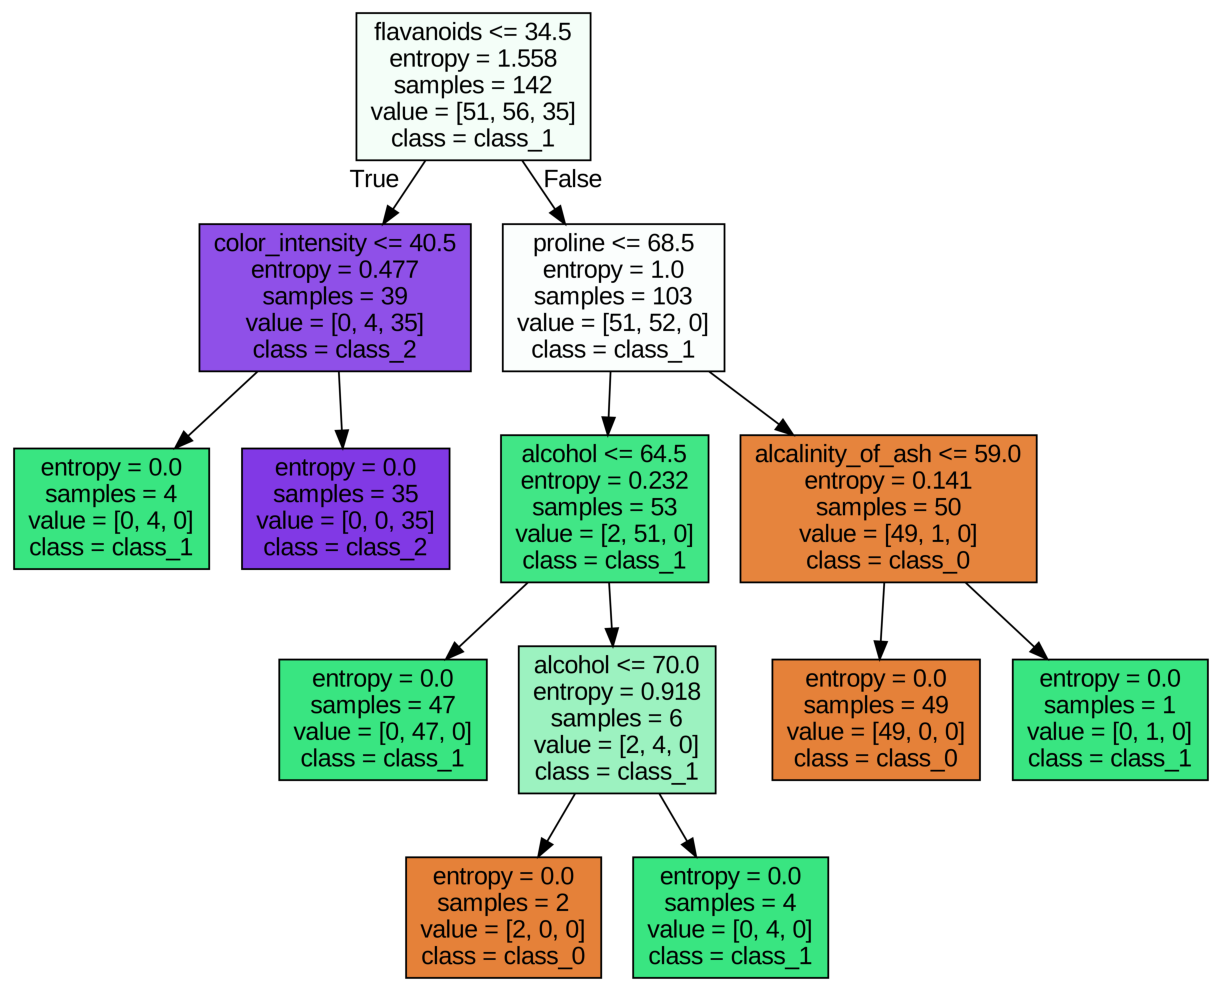

In [86]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import LabelEncoder

# Load wine dataset
wine = load_wine()

# Get the feature names and target names
feature_names = wine.feature_names
target_names = wine.target_names

# Create LabelEncoder object
le = LabelEncoder()

# Apply LabelEncoder to every feature in the wine dataset
for i in range(len(feature_names)):
    feature = wine.data[:,i]
    wine.data[:,i] = le.fit_transform(feature)

# Apply LabelEncoder to the target variable
wine.target = le.fit_transform(wine.target)

# Print the encoded feature values and target values
print("Encoded feature values:\n", wine.data)
print("Encoded target values:\n", wine.target)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine.data,wine.target, test_size=0.2, random_state=100)
'''print(X_train)
print(X_test)
print(y_train)
print(y_test)'''

clf = DecisionTreeClassifier(criterion = "entropy", random_state =24,max_leaf_nodes=24)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print('prediction of test data',y_pred)


from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('confusion matrix',confusion_matrix(y_test, y_pred))
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

from sklearn.tree import export_graphviz
export_graphviz(clf,out_file='wine_entropy.dot',feature_names= feature_names, class_names= target_names,
filled='true')
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'wine_entropy.dot', '-o', 'wine_entropy.png',
'-Gdpi=600'])
# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (40, 18))
plt.imshow(plt.imread('wine_entropy.png'))
plt.axis('off');
plt.show();
